In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# 1. Load cleaned dataset (from Step 1)
df = pd.read_csv("data/cleaned_heart_disease.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

In [3]:
# 2 apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

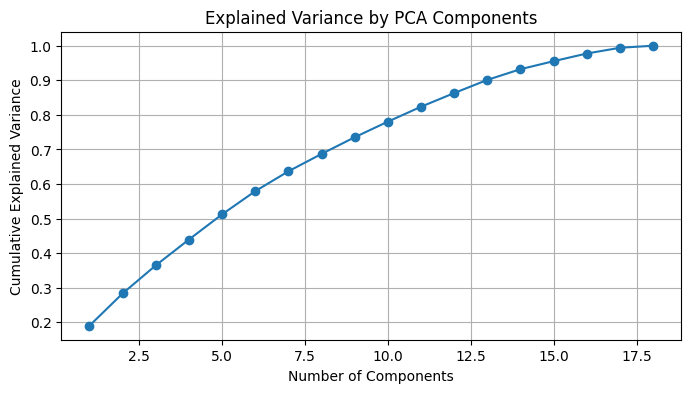

In [4]:
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# 3. Plot variance explained by each component
plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

In [5]:
# 4. Choose number of components
n_components = (cumulative_var >= 0.95).argmax() + 1
print(f"✅ To keep 95% variance, use {n_components} components")

✅ To keep 95% variance, use 15 components


In [6]:
# 5. Refit PCA with optimal components
pca = PCA(n_components=n_components)
X_pca_opt = pca.fit_transform(X)

In [7]:
# 6. Make a DataFrame for the PCA-transformed dataset
df_pca = pd.DataFrame(X_pca_opt, columns=[f"PC{i+1}" for i in range(n_components)])
df_pca["target"] = y.values

In [8]:
# Save PCA-transformed dataset
df_pca.to_csv("data/pca_heart_disease.csv", index=False)
print("✅ PCA-transformed dataset saved to data/pca_heart_disease.csv")

✅ PCA-transformed dataset saved to data/pca_heart_disease.csv


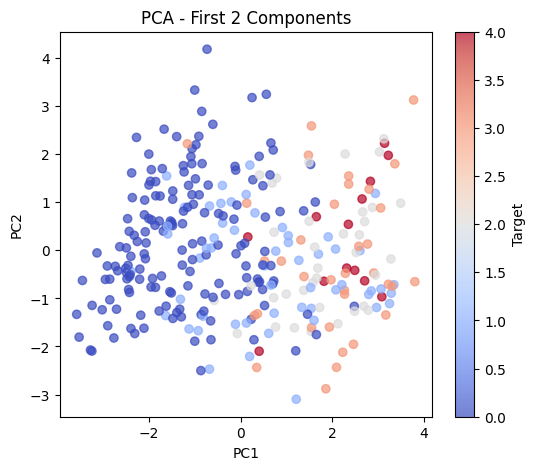

In [9]:
# 7. Scatter plot (first 2 components for visualization)
plt.figure(figsize=(6,5))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First 2 Components")
plt.colorbar(label="Target")
plt.show()

# Only 2 PCA is not enough as the optimal number is 15